# Introduction
#### This project explores restaurant order data to understand patterns during breakfast hours. The goal is to identify demand trends that can support better kitchen staffing and preparation decisions. Exploratory Data Analysis (EDA) is used to surface these patterns.

# Step 0 : Data Orientation
Importing and Reading data

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [104]:
df = pd.read_csv('restaurant_orders.csv')

# Step 1: Data Understanding
1. Dataframe (shape)
2. Head & Tail of the data
3. dtypes
4. describe

In [105]:
df.shape

(500, 8)

In [106]:
df.head()

,Order ID,Customer Name,Food Item,Category,Quantity,Price,Payment Method,Order Time
0,2268,Mary Vega DDS,Pasta,Main,5,16.52,Cash,2025-02-02 14:28:41
1,3082,Brandon Myers,Brownie,Dessert,4,17.27,Debit Card,2025-06-08 10:57:47
2,3160,Margaret Wells,Pasta,Main,1,3.37,Credit Card,2025-03-04 07:41:41
3,1272,Michael Matthews,Pasta,Main,5,2.20,Online Payment,2025-05-15 12:43:45
4,9447,Connor Williams,Soup,Starter,1,12.23,Cash,2025-03-15 14:25:56


In [107]:
df.tail()

,Order ID,Customer Name,Food Item,Category,Quantity,Price,Payment Method,Order Time
495,6323,Alyssa Anthony,Pizza,Main,1,21.31,Cash,2025-01-15 19:21:02
496,9836,Jerry Pineda,Soup,Starter,3,15.99,Debit Card,2025-07-15 15:00:19
497,1202,Brandy Smith,Pasta,Main,2,8.54,Credit Card,2025-08-03 23:47:28
498,7876,Ivan Haynes,Soup,Starter,5,20.54,Credit Card,2025-07-23 08:10:06
499,1509,Amber Mendez,Ice Cream,Dessert,2,18.86,Online Payment,2025-08-09 05:11:27


In [108]:
df.dtypes

Order ID            int64
Customer Name      object
Food Item          object
Category           object
Quantity            int64
Price             float64
Payment Method     object
Order Time         object
dtype: object

In [109]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order ID,500.0,5683.29600,2599.688068,1055.00,3342.00,5762.000,7945.00,9997.00
Quantity,500.0,3.03000,1.474261,1.00,2.00,3.000,4.00,5.00
Price,500.0,13.19718,6.685852,2.06,7.28,13.305,19.08,24.99


# Step 2: Data Preparation
1. Finding Null Values
2. Finding Duplicate Values
3. Inspecting and Adding columns

In [110]:
df.isna().sum()

Order ID          0
Customer Name     0
Food Item         0
Category          0
Quantity          0
Price             0
Payment Method    0
Order Time        0
dtype: int64

In [111]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [112]:
df['total_sum'] = df['Quantity']*df['Price']
df

,Order ID,Customer Name,Food Item,Category,Quantity,Price,Payment Method,Order Time,total_sum
0,2268,Mary Vega DDS,Pasta,Main,5,16.52,Cash,2025-02-02 14:28:41,82.60
1,3082,Brandon Myers,Brownie,Dessert,4,17.27,Debit Card,2025-06-08 10:57:47,69.08
2,3160,Margaret Wells,Pasta,Main,1,3.37,Credit Card,2025-03-04 07:41:41,3.37
3,1272,Michael Matthews,Pasta,Main,5,2.20,Online Payment,2025-05-15 12:43:45,11.00
4,9447,Connor Williams,Soup,Starter,1,12.23,Cash,2025-03-15 14:25:56,12.23
...,...,...,...,...,...,...,...,...,...
495,6323,Alyssa Anthony,Pizza,Main,1,21.31,Cash,2025-01-15 19:21:02,21.31
496,9836,Jerry Pineda,Soup,Starter,3,15.99,Debit Card,2025-07-15 15:00:19,47.97
497,1202,Brandy Smith,Pasta,Main,2,8.54,Credit Card,2025-08-03 23:47:28,17.08
498,7876,Ivan Haynes,Soup,Starter,5,20.54,Credit Card,2025-07-23 08:10:06,102.70


In [113]:
df.rename(columns= {'Customer Name': 'Customer_Name'}, inplace = True)

In [114]:
df['Order Time'] = pd.to_datetime(df['Order Time'])

df['time'] = df['Order Time'].dt.time
df['day_name'] = df['Order Time'].dt.day_name()
df['month'] = df['Order Time'].dt.month
df['hour'] = df['Order Time'].dt.hour
df

,Order ID,Customer_Name,Food Item,Category,Quantity,Price,Payment Method,Order Time,total_sum,time,day_name,month,hour
0,2268,Mary Vega DDS,Pasta,Main,5,16.52,Cash,2025-02-02 14:28:41,82.60,14:28:41,Sunday,2,14
1,3082,Brandon Myers,Brownie,Dessert,4,17.27,Debit Card,2025-06-08 10:57:47,69.08,10:57:47,Sunday,6,10
2,3160,Margaret Wells,Pasta,Main,1,3.37,Credit Card,2025-03-04 07:41:41,3.37,07:41:41,Tuesday,3,7
3,1272,Michael Matthews,Pasta,Main,5,2.20,Online Payment,2025-05-15 12:43:45,11.00,12:43:45,Thursday,5,12
4,9447,Connor Williams,Soup,Starter,1,12.23,Cash,2025-03-15 14:25:56,12.23,14:25:56,Saturday,3,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,6323,Alyssa Anthony,Pizza,Main,1,21.31,Cash,2025-01-15 19:21:02,21.31,19:21:02,Wednesday,1,19
496,9836,Jerry Pineda,Soup,Starter,3,15.99,Debit Card,2025-07-15 15:00:19,47.97,15:00:19,Tuesday,7,15
497,1202,Brandy Smith,Pasta,Main,2,8.54,Credit Card,2025-08-03 23:47:28,17.08,23:47:28,Sunday,8,23
498,7876,Ivan Haynes,Soup,Starter,5,20.54,Credit Card,2025-07-23 08:10:06,102.70,08:10:06,Wednesday,7,8


In [115]:
month_mapping = {
    1 : 'January',
    2 : 'February',
    3 : 'March',
    4 : 'April',
    5 : 'May',
    6 : 'June',
    7 : 'July',
    8 : 'August',
    9 : 'September',
    10 : 'October',
    11 : 'November',
    12 : 'December' }

df['month_name'] = df['Order Time'].dt.month.map(month_mapping)
df

,Order ID,Customer_Name,Food Item,Category,Quantity,Price,Payment Method,Order Time,total_sum,time,day_name,month,hour,month_name
0,2268,Mary Vega DDS,Pasta,Main,5,16.52,Cash,2025-02-02 14:28:41,82.60,14:28:41,Sunday,2,14,February
1,3082,Brandon Myers,Brownie,Dessert,4,17.27,Debit Card,2025-06-08 10:57:47,69.08,10:57:47,Sunday,6,10,June
2,3160,Margaret Wells,Pasta,Main,1,3.37,Credit Card,2025-03-04 07:41:41,3.37,07:41:41,Tuesday,3,7,March
3,1272,Michael Matthews,Pasta,Main,5,2.20,Online Payment,2025-05-15 12:43:45,11.00,12:43:45,Thursday,5,12,May
4,9447,Connor Williams,Soup,Starter,1,12.23,Cash,2025-03-15 14:25:56,12.23,14:25:56,Saturday,3,14,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,6323,Alyssa Anthony,Pizza,Main,1,21.31,Cash,2025-01-15 19:21:02,21.31,19:21:02,Wednesday,1,19,January
496,9836,Jerry Pineda,Soup,Starter,3,15.99,Debit Card,2025-07-15 15:00:19,47.97,15:00:19,Tuesday,7,15,July
497,1202,Brandy Smith,Pasta,Main,2,8.54,Credit Card,2025-08-03 23:47:28,17.08,23:47:28,Sunday,8,23,August
498,7876,Ivan Haynes,Soup,Starter,5,20.54,Credit Card,2025-07-23 08:10:06,102.70,08:10:06,Wednesday,7,8,July


In [116]:
month_order = [
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
]

df['month_name'] = pd.Categorical(
    df['month_name'],
    categories = month_order,
    ordered = True)


In [117]:
df.shape

(500, 14)

In [118]:
df.columns

Index(['Order ID', 'Customer_Name', 'Food Item', 'Category', 'Quantity',
       'Price', 'Payment Method', 'Order Time', 'total_sum', 'time',
       'day_name', 'month', 'hour', 'month_name'],
      dtype='object')

## About the data - 

Order ID: A unique number assigned to each order.

Customer_Name: The name of the customer who placed the order.

Food Item: The specific food  or drink item ordered.

Category: The category of the food item (e.g., Main, Dessert, Starter)

Quantity: The number of units of a specific food item in one order.

Price: The price of a single unit of the food item.

Payment Method: The mode of payment. (e.g., Cash, Debit Card, Credit Card).

Order Time: The exact date and time the order was placed.

total_sum: The total amount paid by the customer.

time: The specific hour,minute and second of when the order was placed.

day_name : Name of the day when order was placed.

month: The numerical month of the order (e.g., 1 for January, 2 for February).

hour: The hour of the day the order was placed.

month_name: The name of the month (e.g., January, February).

date : The numerical value of the date when order was placed.

# Step 3 - Feature Understanding 

## Plotting feature distributions, Univariate Analysis 

## Observation
### The orders are right-skewed, most of the order amount is below 40USD along with a few higher value orders.

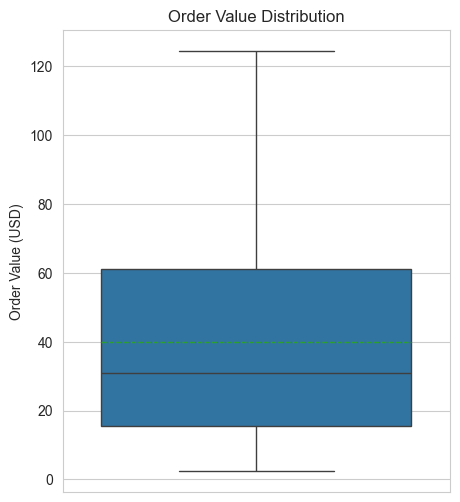

In [119]:
sns.set_style("whitegrid")
plt.subplots(figsize = (5,6))
sns.boxplot(data = df, y= df['total_sum'], showmeans = True, meanline = True, fill = True)
plt.title('Order Value Distribution')
plt.ylabel("Order Value (USD)")

plt.show()

## Observation
### Although Main category shows a slightly higher mean & median value, the overall revenue distribution across categories is largely similar, with substantial overlap in their interquartile ranges.



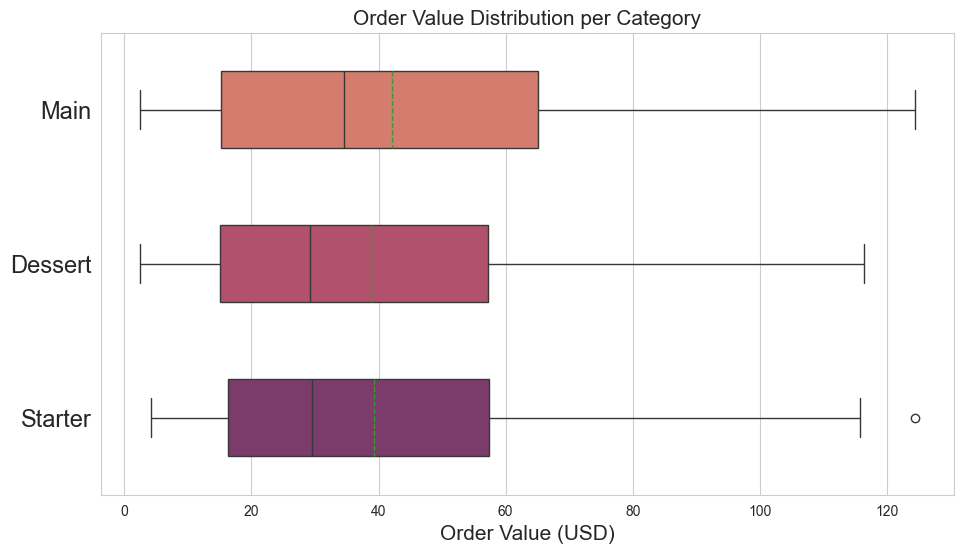

In [229]:
fig,ax = plt.subplots(figsize = (11,6))
sns.set_style("whitegrid")
sns.boxplot(data= df, x=df['total_sum'], y=df['Category'], 
            fill=True, 
            width = 0.5, 
            palette = 'flare',
            showmeans = True, 
            meanline = True,
           hue = df['Category'])
# ax.set_yticks(ax.get_yticks())
# ax.set_yticklabels(ax.get_yticklabels(), rotation=90)
ax.tick_params(axis = 'y', labelsize = 17)
plt.title("Order Value Distribution per Category", fontsize = 15)
plt.xlabel("Order Value (USD)", fontsize = 15)
plt.ylabel("")

plt.show()

## Observation
### Pizza dominates in terms of total quantity ordered, indicating higher overall demand relative to other food items.


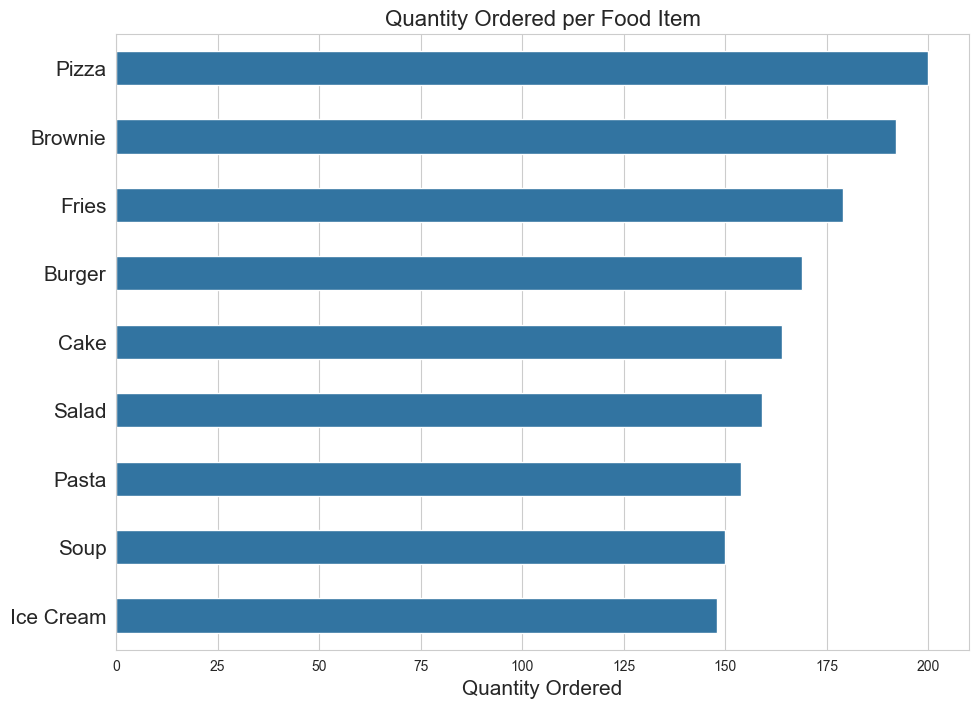

In [178]:
fig, ax = plt.subplots(figsize = (11,8))
sns.set_style("whitegrid")
food_ordered_qty = df.groupby(df['Food Item'])['Quantity'].sum().sort_values(ascending = False)
sns.barplot(x = food_ordered_qty.values, y= food_ordered_qty.index, width = 0.5)
ax.tick_params(axis='y', labelsize=15)
plt.xlabel("Quantity Ordered", fontsize = 15)
plt.ylabel("")
plt.title("Quantity Ordered per Food Item", fontsize = 16)

plt.show()


## Observation
### Pizza leads in order frequency, suggesting strong and consistent demand relative to other food items.

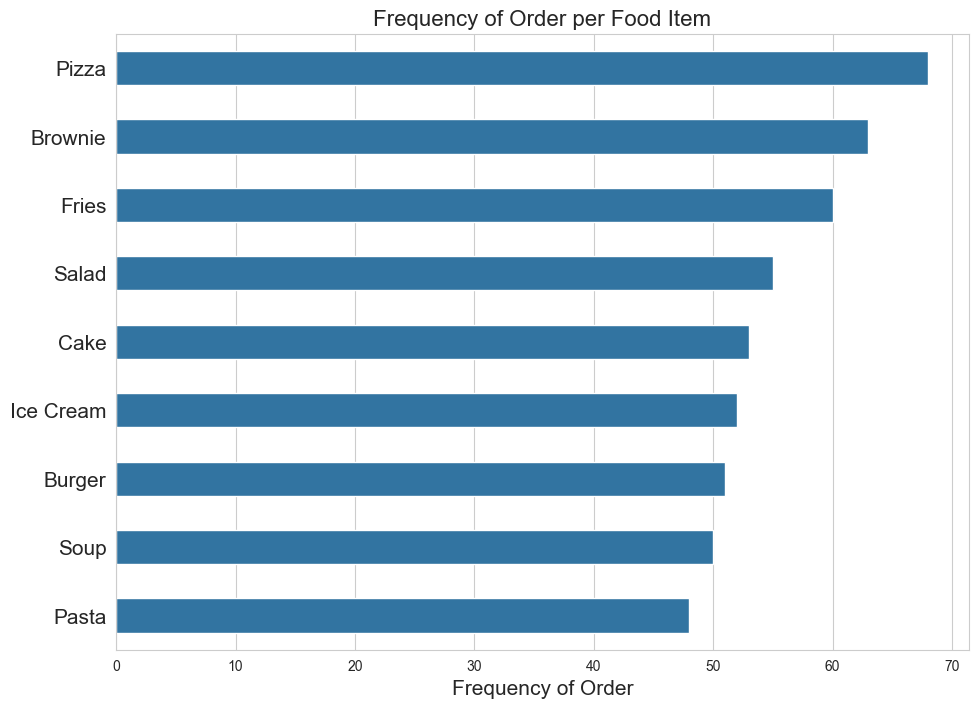

In [230]:
fig, ax = plt.subplots(figsize = (11,8))
sns.set_style("whitegrid")
food_ordered_fqy = df['Food Item'].value_counts().sort_values(ascending = False)
sns.barplot(x = food_ordered_fqy.values, y= food_ordered_fqy.index, width = 0.5)
ax.tick_params(axis='y', labelsize=15)
plt.xlabel("Frequency of Order", fontsize = 15)
plt.ylabel("")
plt.title("Frequency of Order per Food Item", fontsize = 16)

plt.show()


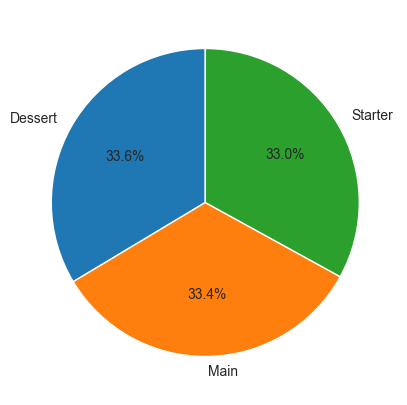

In [218]:
pc = df['Category'].value_counts()
fig,ax = plt.subplots(figsize = (10,5))
plt.pie(pc.values,
        labels = pc.index,
       startangle = 90,
        autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'white'}
       )
plt.show()

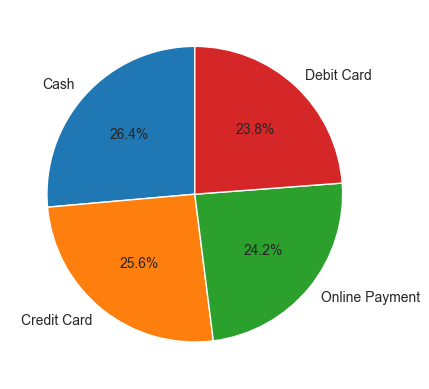

In [217]:
pc2 = df['Payment Method'].value_counts()
plt.pie(pc2.values,
       labels= pc2.index,
       startangle = 90,
       autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'white'})
plt.show()

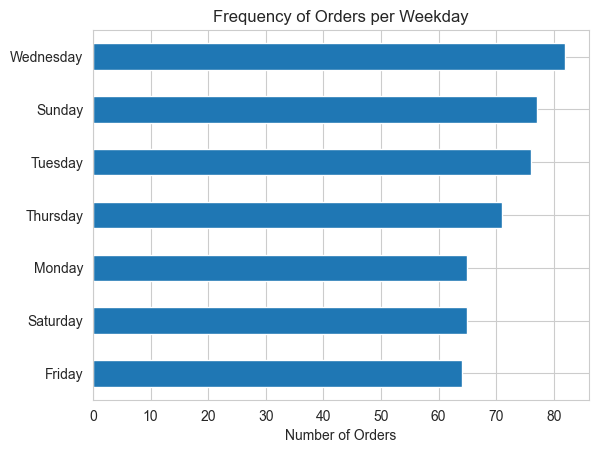

In [222]:
df['day_name'].value_counts().sort_values().plot(kind='barh')
plt.ylabel("")
plt.title("Frequency of Orders per Weekday")
plt.xlabel("Number of Orders")
plt.show()

# Step 4 : Feature Relationship 

In [127]:
df

,Order ID,Customer_Name,Food Item,Category,Quantity,Price,Payment Method,Order Time,total_sum,time,day_name,month,hour,month_name
0,2268,Mary Vega DDS,Pasta,Main,5,16.52,Cash,2025-02-02 14:28:41,82.60,14:28:41,Sunday,2,14,February
1,3082,Brandon Myers,Brownie,Dessert,4,17.27,Debit Card,2025-06-08 10:57:47,69.08,10:57:47,Sunday,6,10,June
2,3160,Margaret Wells,Pasta,Main,1,3.37,Credit Card,2025-03-04 07:41:41,3.37,07:41:41,Tuesday,3,7,March
3,1272,Michael Matthews,Pasta,Main,5,2.20,Online Payment,2025-05-15 12:43:45,11.00,12:43:45,Thursday,5,12,May
4,9447,Connor Williams,Soup,Starter,1,12.23,Cash,2025-03-15 14:25:56,12.23,14:25:56,Saturday,3,14,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,6323,Alyssa Anthony,Pizza,Main,1,21.31,Cash,2025-01-15 19:21:02,21.31,19:21:02,Wednesday,1,19,January
496,9836,Jerry Pineda,Soup,Starter,3,15.99,Debit Card,2025-07-15 15:00:19,47.97,15:00:19,Tuesday,7,15,July
497,1202,Brandy Smith,Pasta,Main,2,8.54,Credit Card,2025-08-03 23:47:28,17.08,23:47:28,Sunday,8,23,August
498,7876,Ivan Haynes,Soup,Starter,5,20.54,Credit Card,2025-07-23 08:10:06,102.70,08:10:06,Wednesday,7,8,July


In [128]:
df.groupby(['hour']).total_sum.sum()

hour
0      749.66
1      559.41
2      590.36
3      725.17
4      757.32
5      838.80
6      643.78
7      909.11
8     1372.59
9      942.87
10     610.55
11     727.29
12    1234.62
13    1021.50
14    1307.79
15     750.38
16     810.20
17     903.40
18     720.13
19    1049.50
20     746.05
21     641.20
22     693.35
23     718.11
Name: total_sum, dtype: float64

In [129]:
hourly_orders = df.groupby(['hour']).total_sum.sum()
x_hourly_orders = hourly_orders.index
y_hourly_orders = hourly_orders.values

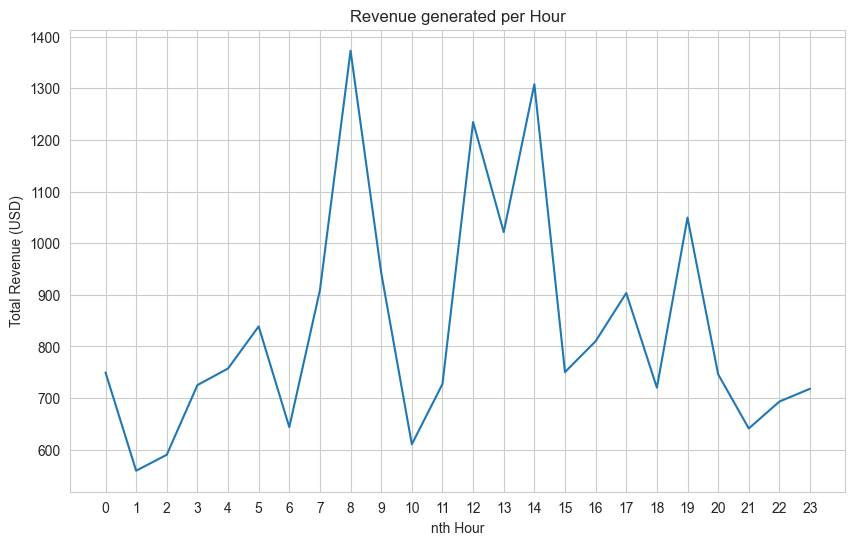

In [130]:
fig,ax = plt.subplots(figsize=(10,6))
plt.plot(x_hourly_orders, y_hourly_orders)
ax.set_xticks(x_hourly_orders)
plt.title("Revenue generated per Hour")
plt.xlabel("nth Hour")
plt.ylabel("Total Revenue (USD)")
plt.show()


In [131]:
category_by_hour = df.groupby('hour')['Category'].value_counts().unstack().idxmax(axis = 1)

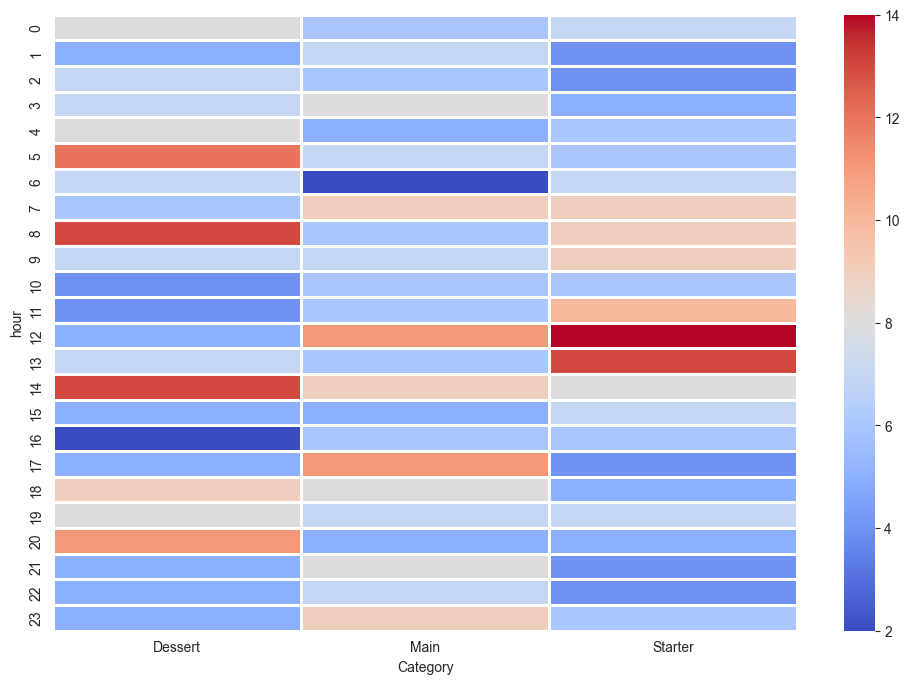

In [132]:
category_byhour = df.groupby('hour')['Category'].value_counts().unstack()
plt.figure(figsize = (12,8))
sns.heatmap(category_byhour, linewidths = 1, cmap = 'coolwarm')
plt.show()

# Step 5 : Asking Questions

## The Goal : Breakfast Optimization
At this stage, I will be using the data-set to find specific trends that will help the restaurant to optimize their kitchen during breakfast hours (which also happens to be the time period with highest sales).

In [133]:
df

,Order ID,Customer_Name,Food Item,Category,Quantity,Price,Payment Method,Order Time,total_sum,time,day_name,month,hour,month_name
0,2268,Mary Vega DDS,Pasta,Main,5,16.52,Cash,2025-02-02 14:28:41,82.60,14:28:41,Sunday,2,14,February
1,3082,Brandon Myers,Brownie,Dessert,4,17.27,Debit Card,2025-06-08 10:57:47,69.08,10:57:47,Sunday,6,10,June
2,3160,Margaret Wells,Pasta,Main,1,3.37,Credit Card,2025-03-04 07:41:41,3.37,07:41:41,Tuesday,3,7,March
3,1272,Michael Matthews,Pasta,Main,5,2.20,Online Payment,2025-05-15 12:43:45,11.00,12:43:45,Thursday,5,12,May
4,9447,Connor Williams,Soup,Starter,1,12.23,Cash,2025-03-15 14:25:56,12.23,14:25:56,Saturday,3,14,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,6323,Alyssa Anthony,Pizza,Main,1,21.31,Cash,2025-01-15 19:21:02,21.31,19:21:02,Wednesday,1,19,January
496,9836,Jerry Pineda,Soup,Starter,3,15.99,Debit Card,2025-07-15 15:00:19,47.97,15:00:19,Tuesday,7,15,July
497,1202,Brandy Smith,Pasta,Main,2,8.54,Credit Card,2025-08-03 23:47:28,17.08,23:47:28,Sunday,8,23,August
498,7876,Ivan Haynes,Soup,Starter,5,20.54,Credit Card,2025-07-23 08:10:06,102.70,08:10:06,Wednesday,7,8,July


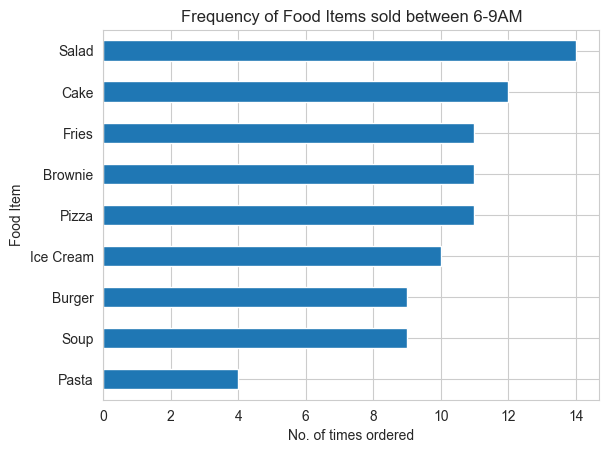

In [134]:
df_bfast = df.loc[df['hour'].between(6,9), :]
ax = df_bfast['Food Item'].value_counts().sort_values().plot(kind = 'barh', title = 'Frequency of Food Items sold between 6-9AM')
ax.set_xlabel("No. of times ordered")
plt.show()

Task : To segregate the amount 

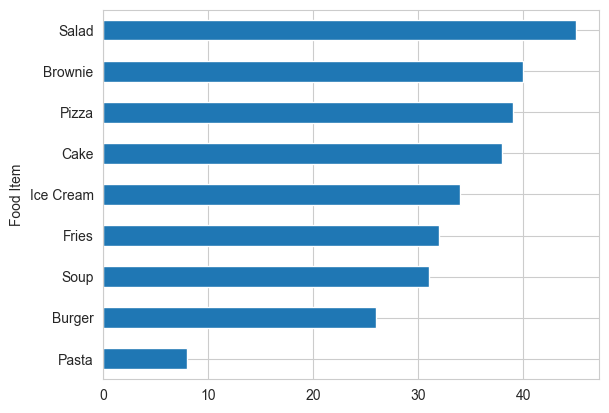

In [135]:
df_bfast.groupby('Food Item')['Quantity'].sum().sort_values().plot(kind = 'barh')
plt.show()

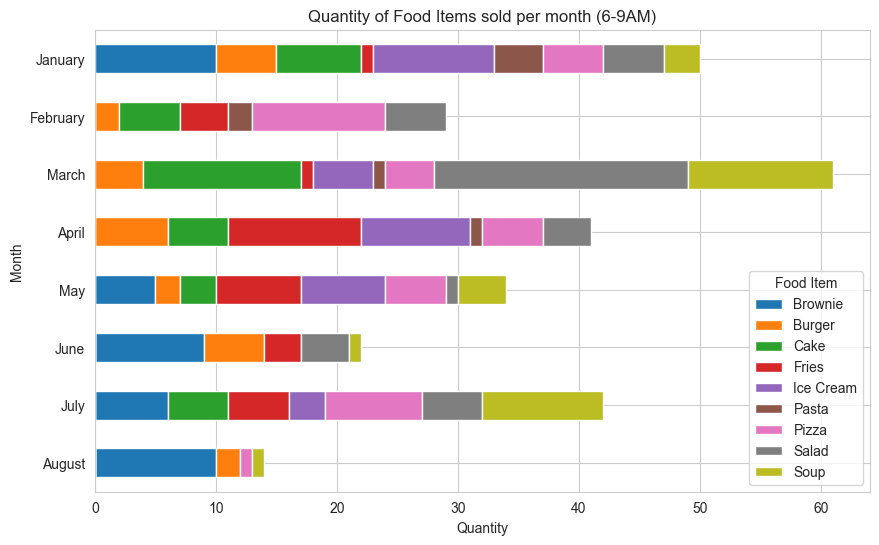

In [136]:
fig,ax = plt.subplots(figsize= (10,6))

df_bfast.groupby(['month_name', 'Food Item'], observed = True)['Quantity'].sum().unstack().iloc[::-1].plot(kind = 'barh', stacked = True, ax= ax)
plt.ylabel("Month")
plt.xlabel("Quantity")
plt.title('Quantity of Food Items sold per month (6-9AM)')
plt.show()



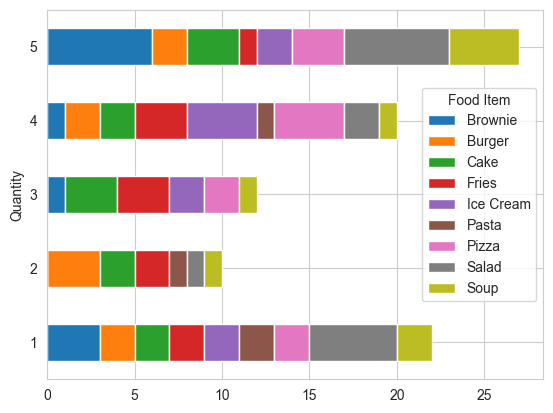

In [137]:
df_bfast.groupby('Quantity')['Food Item'].value_counts().unstack().plot(kind = 'barh', stacked = True)
plt.show()

## Understanding if they are repeat customers //

In [138]:
df_bfast.loc[df_bfast['Food Item'] == "Pasta", :]

# df.loc[df.duplicated(subset = "Customer_Name")]
# df.duplicated(subset = "Customer Name").value_counts() (3)

,Order ID,Customer_Name,Food Item,Category,Quantity,Price,Payment Method,Order Time,total_sum,time,day_name,month,hour,month_name
2,3160,Margaret Wells,Pasta,Main,1,3.37,Credit Card,2025-03-04 07:41:41,3.37,07:41:41,Tuesday,3,7,March
153,9301,Jessica Jacobs,Pasta,Main,1,17.89,Credit Card,2025-04-07 07:43:46,17.89,07:43:46,Monday,4,7,April
291,3402,Mrs. Kristi Myers,Pasta,Main,2,21.07,Cash,2025-02-04 08:47:41,42.14,08:47:41,Tuesday,2,8,February
297,7554,Maurice Lyons,Pasta,Main,4,2.69,Credit Card,2025-01-12 07:18:52,10.76,07:18:52,Sunday,1,7,January


In [139]:
df.query(
    'Customer_Name.isin(["Margaret Wells", "Jessica Jacobs", "Mrs. Kristi Myers", "Maurice Lyons"])'
)

,Order ID,Customer_Name,Food Item,Category,Quantity,Price,Payment Method,Order Time,total_sum,time,day_name,month,hour,month_name
2,3160,Margaret Wells,Pasta,Main,1,3.37,Credit Card,2025-03-04 07:41:41,3.37,07:41:41,Tuesday,3,7,March
153,9301,Jessica Jacobs,Pasta,Main,1,17.89,Credit Card,2025-04-07 07:43:46,17.89,07:43:46,Monday,4,7,April
291,3402,Mrs. Kristi Myers,Pasta,Main,2,21.07,Cash,2025-02-04 08:47:41,42.14,08:47:41,Tuesday,2,8,February
297,7554,Maurice Lyons,Pasta,Main,4,2.69,Credit Card,2025-01-12 07:18:52,10.76,07:18:52,Sunday,1,7,January


Q. Is seasonal breakfast demand stable?

In [140]:
std_bfast_quantity =  np.std(df_bfast.groupby('month_name', observed = True)['Quantity'].sum())
mean_bfast_quantity = np.mean(df_bfast.groupby('month_name', observed = True)['Quantity'].sum())
cv = std_bfast_quantity / mean_bfast_quantity * 100

print(f"Standard Deviation: {std_bfast_quantity} ")
print(f"Mean: {mean_bfast_quantity}")
print(f"Coefficient of Variation: {cv:.2f}%")


Standard Deviation: 14.194519188757328 
Mean: 36.625
Coefficient of Variation: 38.76%


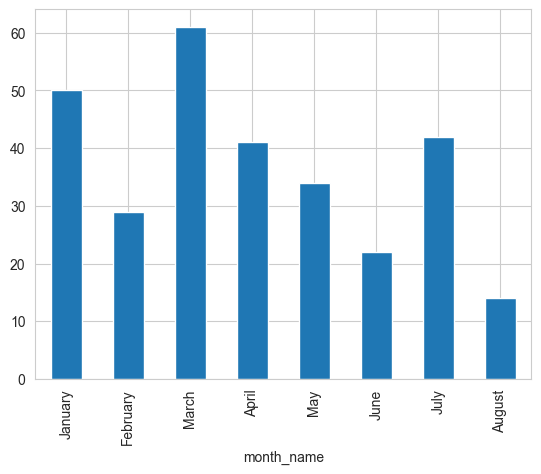

In [141]:
df_bfast.groupby('month_name', observed = True)['Quantity'].sum().plot(kind= 'bar')
plt.show()

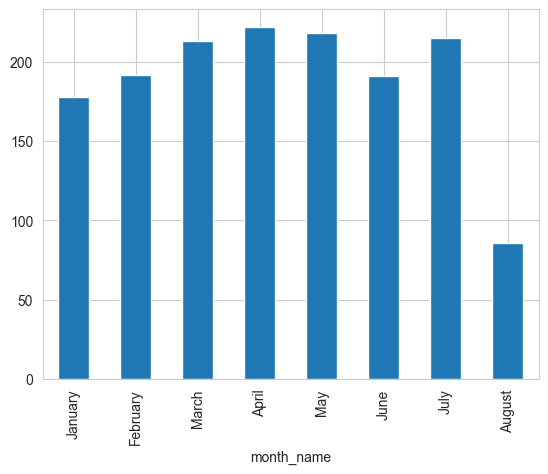

In [142]:
df.groupby('month_name', observed = True)['Quantity'].sum().plot(kind = 'bar')
plt.show()

In [143]:
df['date'] = df['Order Time'].dt.date
df.loc[df['month_name'] == "August",:].sort_values(by = 'date')

,Order ID,Customer_Name,Food Item,Category,Quantity,Price,Payment Method,Order Time,total_sum,time,day_name,month,hour,month_name,date
55,6309,Sheri White,Salad,Starter,5,15.44,Online Payment,2025-08-01 17:25:44,77.20,17:25:44,Friday,8,17,August,2025-08-01
73,2234,Jillian Jackson,Brownie,Dessert,3,21.28,Debit Card,2025-08-01 16:44:35,63.84,16:44:35,Friday,8,16,August,2025-08-01
121,9240,Zachary Fisher,Brownie,Dessert,5,7.57,Debit Card,2025-08-01 08:53:34,37.85,08:53:34,Friday,8,8,August,2025-08-01
126,8430,Matthew Hays,Ice Cream,Dessert,1,4.10,Cash,2025-08-01 20:43:44,4.10,20:43:44,Friday,8,20,August,2025-08-01
386,6272,Vicki Taylor,Ice Cream,Dessert,2,3.80,Online Payment,2025-08-03 20:50:56,7.60,20:50:56,Sunday,8,20,August,2025-08-03
497,1202,Brandy Smith,Pasta,Main,2,8.54,Credit Card,2025-08-03 23:47:28,17.08,23:47:28,Sunday,8,23,August,2025-08-03
24,9125,Cindy Smith,Fries,Starter,3,16.68,Online Payment,2025-08-04 13:08:16,50.04,13:08:16,Monday,8,13,August,2025-08-04
478,6686,John Sutton,Burger,Main,2,6.44,Debit Card,2025-08-04 07:20:19,12.88,07:20:19,Monday,8,7,August,2025-08-04
392,8279,Richard Roberts,Burger,Main,2,12.61,Credit Card,2025-08-04 00:41:21,25.22,00:41:21,Monday,8,0,August,2025-08-04
43,9211,Richard Lee,Pizza,Main,5,6.59,Cash,2025-08-05 22:33:42,32.95,22:33:42,Tuesday,8,22,August,2025-08-05


In [144]:
std_bfast_quantity =  np.std(df_bfast.groupby('month_name', observed = True)['Quantity'].sum())
mean_bfast_quantity = np.mean(df_bfast.groupby('month_name', observed = True)['Quantity'].sum())
cv = std_bfast_quantity / mean_bfast_quantity * 100

print(f"Standard Deviation: {std_bfast_quantity} ")
print(f"Mean: {mean_bfast_quantity}")
print(f"Coefficient of Variation: {cv:.2f}%")


Standard Deviation: 14.194519188757328 
Mean: 36.625
Coefficient of Variation: 38.76%
